# Decision Trees mit dem Titanic-Datensatz
In diesem Jupyter Notebook schauen wir uns Entscheidungsbäume anhand des Titanic-Datensatzes an. Der Titanic-Datensatz beschreibt einen Teil der Reisenden auf der Titanic, unter anderem ob diese die Fahrt überlebt haben oder nicht.

- Der originale Datensatz kann hier abgerufen werden: https://www.kaggle.com/c/titanic
- Der hier verwendete Datensatz wurde zwecks Einfachheit bereits überarbeitet und angereichtert

## Lade Libraries und Daten

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

df = pd.read_csv('data/titanic_enh.csv')

ModuleNotFoundError: No module named 'seaborn'

## Datensatzbeschreibung

- PassengerId: Durchgehende Nummerierung der Datensatzeinträge
- Survived: 1 wenn Passagier überlebte, 0 wenn nicht
- Pclass: Passagierklasse. Enthält die Werte 1 bis 3, wobei 1 der ersten Klasse entspricht
- Name: Name der jeweiligen Person
- Sex: Geschlecht. 0 für Weiblich, 1 für Männlich
- Age: Altersgruppe
  - 0 -> 16 oder jünger
  - 1 -> Zwischen 16 und 32
  - 2 -> Zwischen 32 und 48
  - 3 -> Zwischen 48 und 64
  - 4 -> Älter als 64
- Ticket: Ticketnummer
- Fare: Kostenklasse der Färe.
  - 0 -> Ticket kostete 7.91 Pounds oder weniger
  - 1 -> Ticket kostete zwischen 7.91 und 14.454 Pounds
  - 2 -> Ticket kostete zwischen 14.454 und 31 Pounds
  - 3 -> Ticket kostete mehr als 31 Pounds
- Embarked: Ort des Zustiegs
  - 0 -> Southampton
  - 1 -> Cherbourg
  - 2 -> Queenstown
- Has_Cabin: 1 Wenn Passagier eine Kabine hatte, 0 wenn nicht
- FamilySize: Anzahl mitglieder der reisenden Familie
- IsAlone: 1 wenn Passagier alleine reiste, 0 wenn nicht
- Title: Namenstitel.
  - 1 -> Mr
  - 2 -> Master
  - 3 -> Mrs
  - 4 -> Miss
  - 5 -> Kein Titel

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,0,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,1,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,0,1,1,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,1,2,0,3
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,1,0,0,211536,1,NaN,0,0,1,1,5
887,888,1,1,"Graham, Miss. Margaret Edith",0,1,0,0,112053,2,B42,0,1,1,1,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,W./C. 6607,2,NaN,0,0,4,0,4
889,890,1,1,"Behr, Mr. Karl Howell",1,1,0,0,111369,2,C148,1,1,1,1,1


## <span style="color:red"> Aufgabe 1</span>
Überschaffe dir zuerst einen kleinen Überblick über den Datensatz. Kombiniere verschiedene Variablen mit der Variable *Survived* um zu sehen, welche Eigenschaften einen Einfluss auf das Überleben der Passagiere hatte.

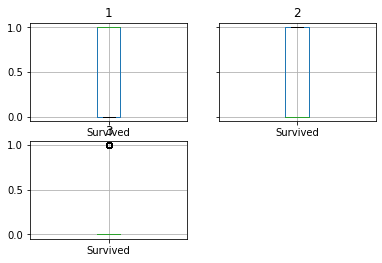

In [11]:
df.groupby('Pclass').boxplot(column='Survived');